In [ ]:
!pip install missingno

from google.colab import files
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
uploaded = files.upload()

Saving OSA_DB_UPM.xlsx to OSA_DB_UPM.xlsx


In [ ]:
# Specify the file name
file_name = 'OSA_DB_UPM.xlsx'

# Read the Excel file into a DataFrame
df_tmp_class = pd.read_excel(file_name)
df_tmp_class.head(20)

,IAH,Weight,Height,Age,PerCervical,Gender
0,29.6,119,174,56,48.0,hombre
1,19.7,78,168,39,42.0,hombre
2,9.0,80,173,32,40.0,hombre
3,2.0,109,190,32,42.0,hombre
4,34.0,86,169,39,42.0,hombre
5,60.0,145,172,47,44.0,hombre
6,22.0,72,165,40,42.0,hombre
7,11.0,80,180,28,38.0,hombre
8,3.7,90,180,36,40.0,hombre
9,7.0,50,158,50,35.0,mujer


**Visualization of the class distribution**

### Ingeneering feature : Creating the BMI

In [ ]:
df_tmp_class['BMI'] = df_tmp_class['Weight']/((df_tmp_class['Height']/100)**2)

## Feature selection

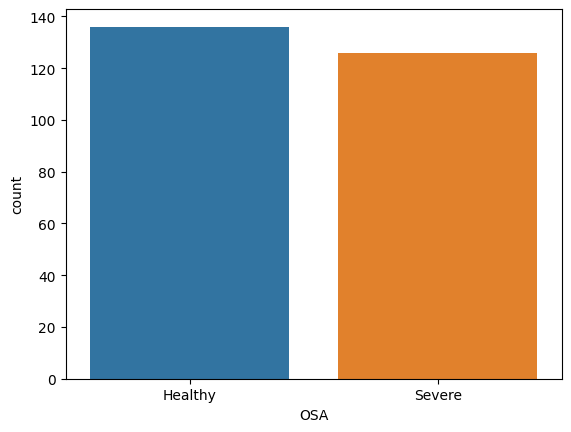

In [ ]:
# Extrem OSA dataframe creation
df_tmp_class = df_tmp_class[(df_tmp_class['IAH'] > 30) | (df_tmp_class['IAH'] < 10)]

# Creating a new feature 'OSA' based on the 'IAH' values for the Classification
df_tmp_class['OSA'] = np.where(df_tmp_class['IAH'] > 30, 'Severe', 'Healthy')

#Extra_male_femal_OSA
df_tmp_class_men = df_tmp_class.groupby('Gender').get_group('hombre')
df_tmp_class_women = df_tmp_class.groupby('Gender').get_group('mujer')

# Seperating the data by gender
df_tmp_class = df_tmp_class_men

sns.countplot(x = 'OSA', data = df_tmp_class_men[['OSA', 'BMI', 'Age', 'Height', 'Weight', 'PerCervical']])
plt.show()

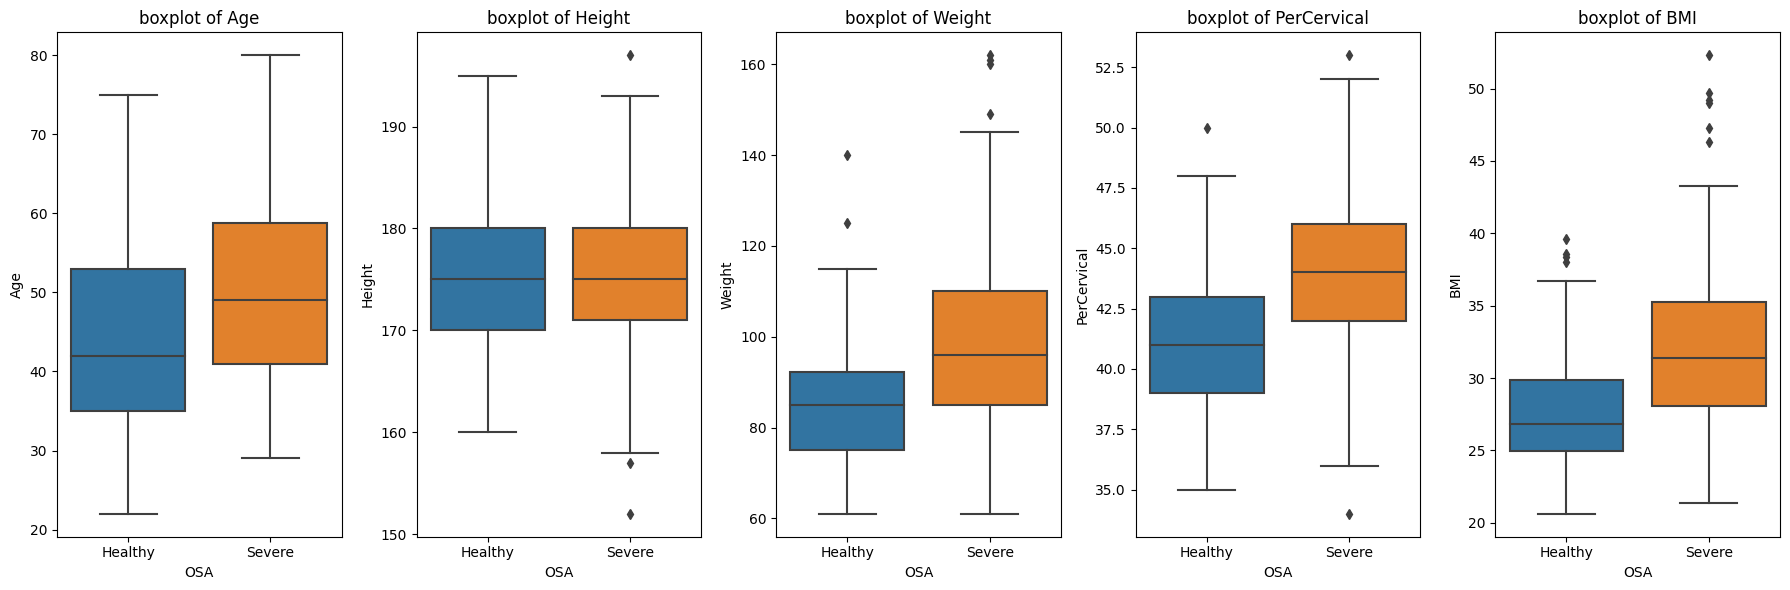

In [ ]:
features = ['Age', 'Height', 'Weight', 'PerCervical', 'BMI']
num_cols = len(features)
fig, axes = plt.subplots(1, num_cols, figsize = (18, 6))

for i, feature in enumerate(features):
    sns.boxplot(x = 'OSA', y = feature, data = df_tmp_class, ax = axes[i])
    axes[i].set_title(f'boxplot of {feature}')

plt.tight_layout()
plt.show()

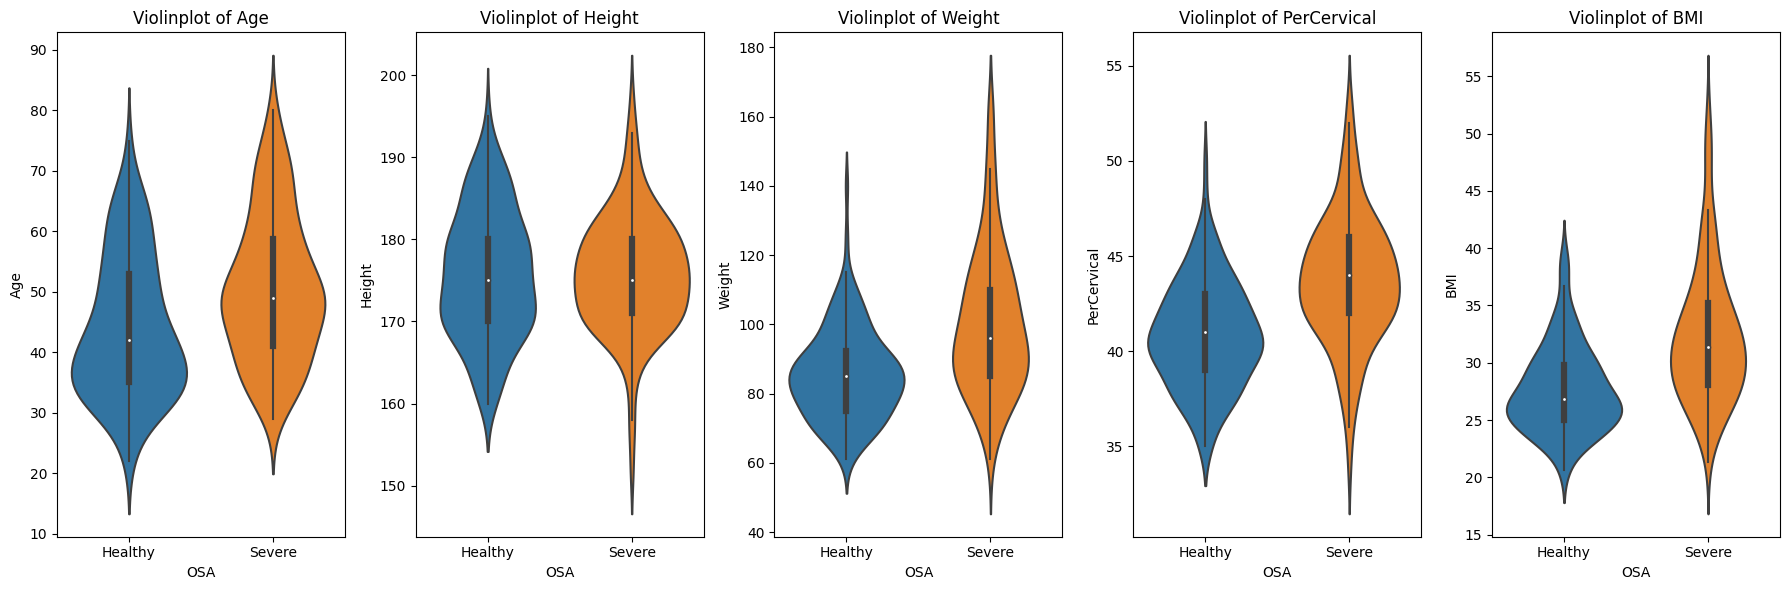

In [ ]:
features = ['Age', 'Height', 'Weight', 'PerCervical', 'BMI']
num_cols = len(features)
fig, axes = plt.subplots(1, num_cols, figsize=(18, 6))

for i, feature in enumerate(features):
    sns.violinplot(x='OSA', y=feature, data=df_tmp_class, ax=axes[i])
    axes[i].set_title(f'Violinplot of {feature}')

plt.tight_layout()
plt.show()


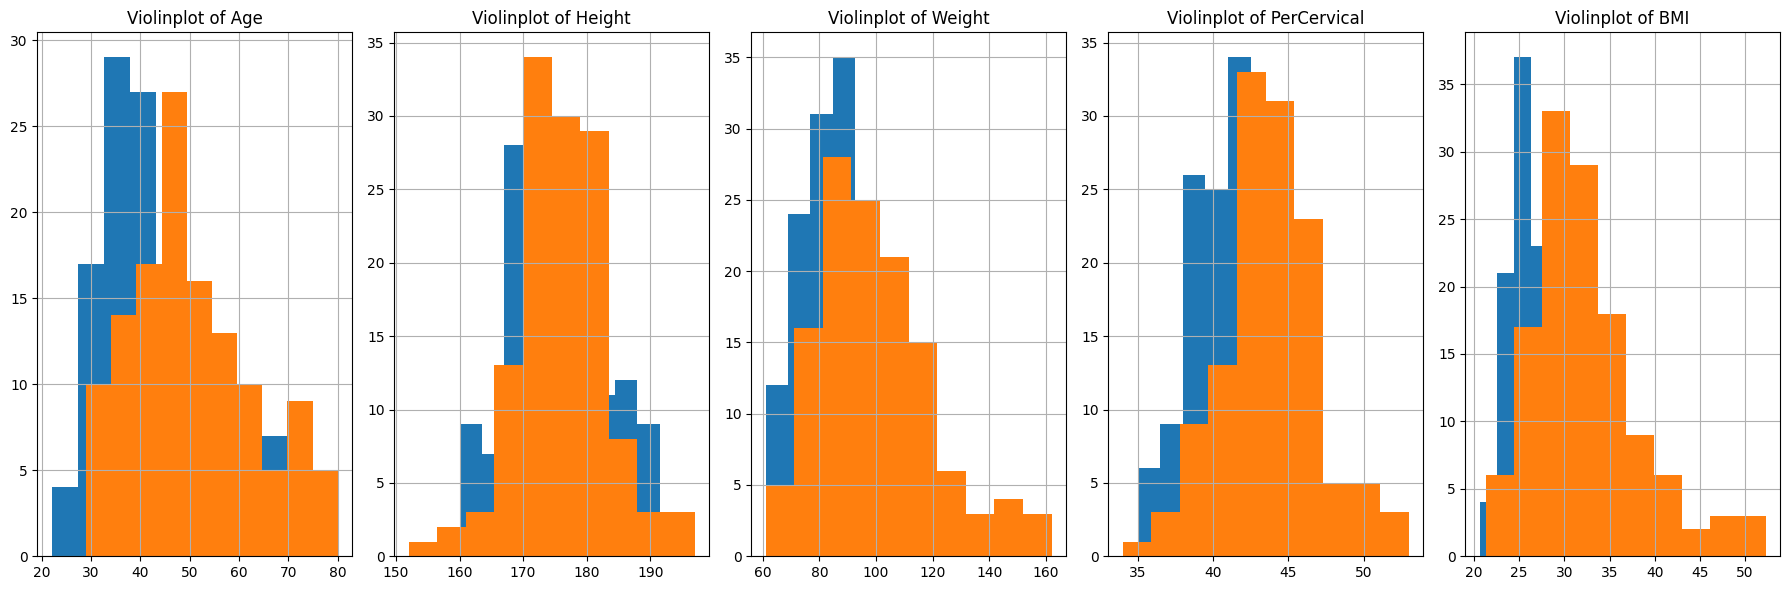

In [ ]:
features = ['Age', 'Height', 'Weight', 'PerCervical', 'BMI']
num_cols = len(features)
fig, axes = plt.subplots(1, num_cols, figsize=(18, 6))

for i, feature in enumerate(features):
    df_tmp_class.groupby('OSA')[feature].hist(ax=axes[i])
    axes[i].set_title(f'Violinplot of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

features = ['Age', 'Height', 'Weight', 'PerCervical', 'BMI']

for feature in features:
    group1_healthy = df_tmp_class[df_tmp_class['OSA'] == 'Healthy'].dropna()[feature]
    group2_severe = df_tmp_class[df_tmp_class['OSA'] == 'Severe'].dropna()[feature]

    mannwhitneyu_result = stats.mannwhitneyu(group1_healthy, group2_severe)
    ttest_result = stats.ttest_ind(group1_healthy, group2_severe)

    print(f"Results for {feature}:")
    print(f"Mann-Whitney U Test: \n  \t  {mannwhitneyu_result}")
    print(f"Independent Samples T-Test: \n \t {ttest_result}")
    print()

Results for Age:
Mann-Whitney U Test: 
  	  MannwhitneyuResult(statistic=5893.5, pvalue=1.2700130687470718e-05)
Independent Samples T-Test: 
 	 TtestResult(statistic=-4.505786833888479, pvalue=1.000149489088424e-05, df=260.0)

Results for Height:
Mann-Whitney U Test: 
  	  MannwhitneyuResult(statistic=8406.0, pvalue=0.791787219936257)
Independent Samples T-Test: 
 	 TtestResult(statistic=-0.12154043590146003, pvalue=0.9033568695669398, df=260.0)

Results for Weight:
Mann-Whitney U Test: 
  	  MannwhitneyuResult(statistic=4710.0, pvalue=3.03486085814632e-10)
Independent Samples T-Test: 
 	 TtestResult(statistic=-7.004764329335262, pvalue=2.113634855909769e-11, df=260.0)

Results for PerCervical:
Mann-Whitney U Test: 
  	  MannwhitneyuResult(statistic=4187.5, pvalue=6.991030717845747e-13)
Independent Samples T-Test: 
 	 TtestResult(statistic=-7.635149215097977, pvalue=4.3062473833536063e-13, df=260.0)

Results for BMI:
Mann-Whitney U Test: 
  	  MannwhitneyuResult(statistic=4191.0, pvalu

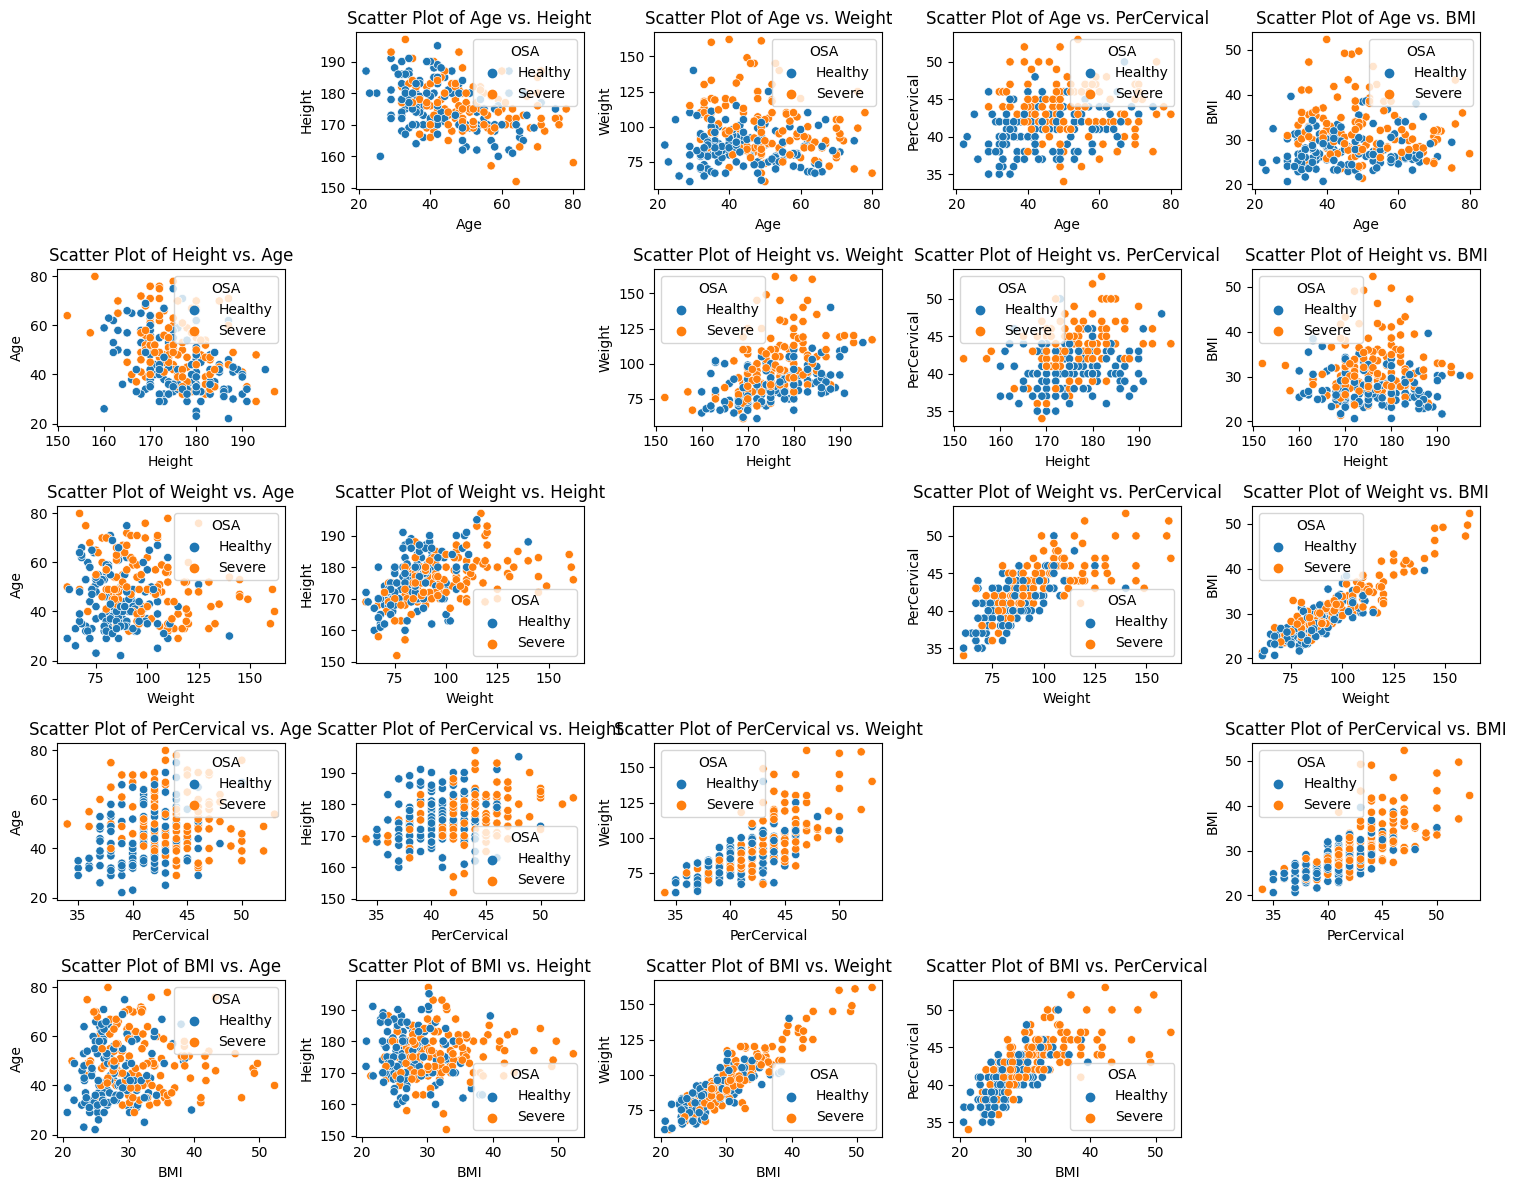

In [ ]:
features = ['Age', 'Height', 'Weight', 'PerCervical', 'BMI']

num_cols = len(features)

fig, axes = plt.subplots(num_cols, num_cols, figsize=(15, 12))

for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i == j:
            axes[i, j].axis('off')
            continue

        sns.scatterplot(data=df_tmp_class, x=feature1, y=feature2, hue='OSA', ax=axes[i, j])
        axes[i, j].set_title(f'Scatter Plot of {feature1} vs. {feature2}')

plt.tight_layout()
plt.show()

In [ ]:
df_tmp_class_men.to_excel("OSA_extreme_male.xlsx", index = False)

In [ ]:
df_tmp_class_women.to_excel("OSA_extreme_female.xlsx", index = False)